In [1]:
# Check Python Version
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.5.6 |Anaconda 4.1.1 (64-bit)| (default, Aug 26 2018, 21:41:56) 
[GCC 7.3.0]
scipy: 0.19.0
numpy: 1.11.3
matplotlib: 1.5.1
pandas: 0.23.4
sklearn: 0.18.1


In [2]:
import numpy as np
from sklearn import preprocessing, cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import pandas as pd

/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)


In [4]:
# Preprocess the data
df.replace('?',-99999, inplace=True)
print(df.axes)

df.drop(['id'], 1, inplace=True)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [5]:
# Let explore the dataset and do a few visualizations
print(df.loc[10])

# Print the shape of the dataset
print(df.shape)

clump_thickness           1
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    1
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 10, dtype: object
(699, 10)


In [6]:
# Describe the dataset
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


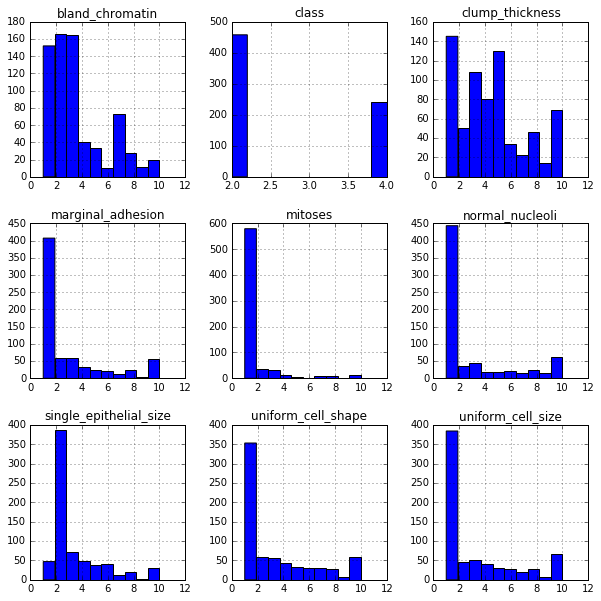

In [7]:
# Plot histograms for each variable
%matplotlib inline
df.hist(figsize = (10, 10))
plt.show()

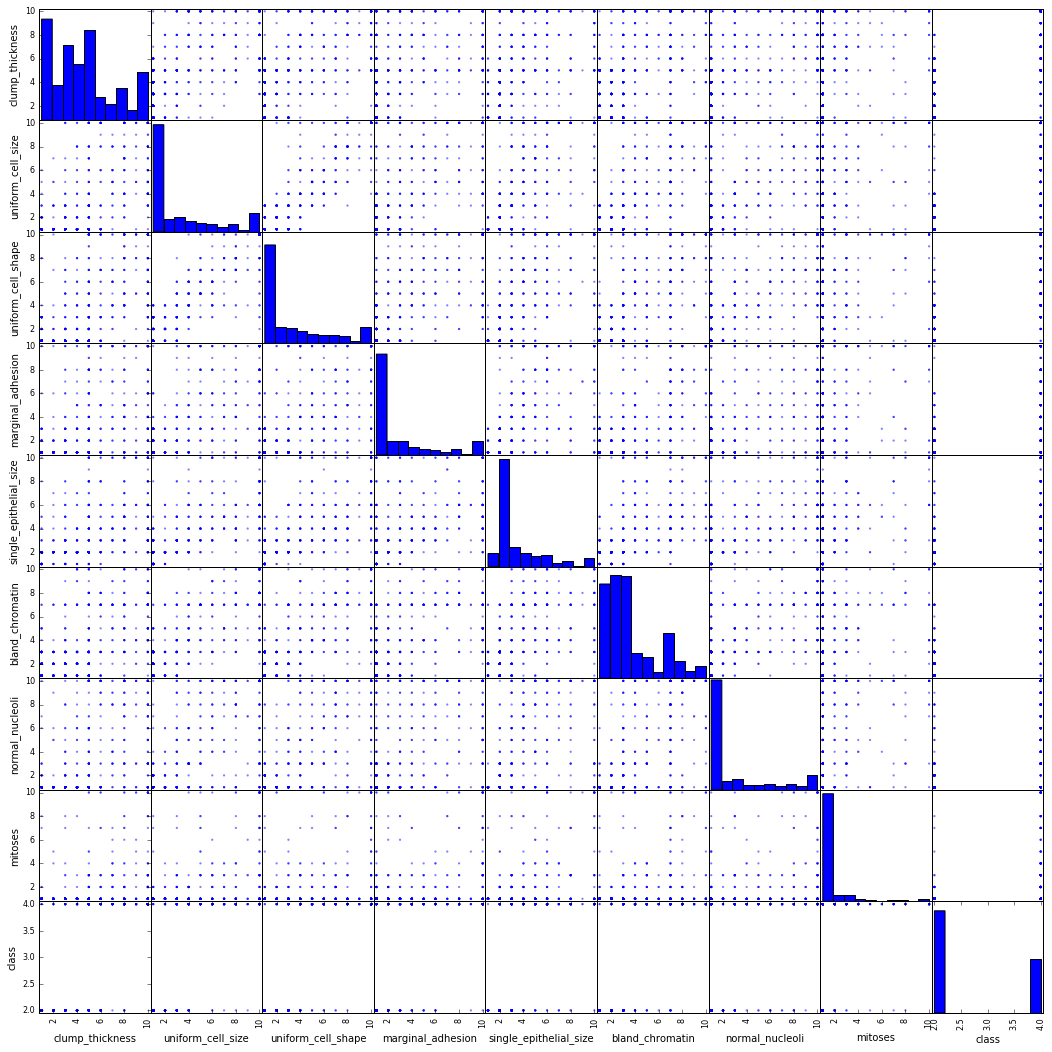

In [8]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

In [9]:
# Create X and Y datasets for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [10]:
# Testing Options
seed = 8
scoring = 'accuracy'

In [11]:
# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.973182 (0.019951)
SVM: 0.962468 (0.021768)


In [12]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 

KNN
0.95
             precision    recall  f1-score   support

          2       0.96      0.97      0.96        95
          4       0.93      0.91      0.92        45

avg / total       0.95      0.95      0.95       140

SVM
0.928571428571
             precision    recall  f1-score   support

          2       0.99      0.91      0.95        95
          4       0.83      0.98      0.90        45

avg / total       0.94      0.93      0.93       140



In [13]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.928571428571
[2]
